In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 11 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 1s (3,399 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl

In [ ]:
import pytesseract
from PIL import Image
import datetime
import shutil
import cv2
import re
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
def extract_text(img): 
        #img=Image.open(self.image_file)
        #resize the image
        img = cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
        #convert the image to gray
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        #the following command uses the tesseract directory path to get the trained data in the config option
        text=pytesseract.image_to_string(img) 
        return text




In [ ]:
img=cv2.imread('adss.jpeg')
text=extract_text(img)
text

' \n\nShivam Sharma\n\nae fata / DOB : 21/08/1999\n\nGea /M\n\nale\n\n \n\n7562 1393 1561\n\n \n\x0c'

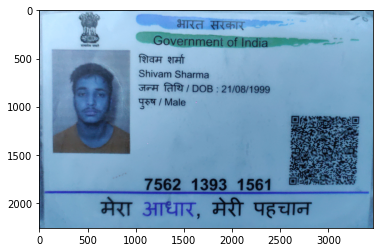

In [ ]:
plt.imshow(img)

In [73]:
def is_aadhar_card(text):
               res=text.split()
               dates={}           
               if 'GOVERNMENT OF INDIA'  in text:
                   print ("Aadhar card is valid and the details are below:")
                   index=res.index('INDIA')
                   name=''
                   if res[index+3].isalpha():
                      name= res[index+3] + " " + res[index+4] + " " + res[index+5]
                   else :
                      name= res[index+4] + " " + res[index+5] + " " + res[index+6]
               else:
                    name=res[0] + " " + res[1]
               if len(name)>1:
                   print("Name:  " + name)
               else:
                    print("Name not read")
               p = re.compile(r'\d\d[/]\d\d[/]\d\d\d\d')
               if (p.findall(text)):
                    dates=p.findall(text)
                    
                    
               if len(dates)>0 and len(dates[0])>1:
                   print("Date of birth:"+ str(dates[0]))
               aadhar_number=''
               for word in res:
                  if 'yob' in word.lower():
                       yob=re.findall('d+', word)
                       if yob:
                           print ('Year of Birth: ' + yob[0])
                  if len(word) == 4 and word.isdigit():
                      aadhar_number=aadhar_number  + word + ' '
               if len(aadhar_number)>=14:
                   print("Aadhar number is :"+ aadhar_number)
               else:
                    print("Aadhar number not read")
                    print("Try again or try  another file")

In [74]:
text=' Shivam Sharma ae fata / DOB : 21/08/1999 Gea /Male 7562 1393 1561'
p = re.compile(r'\d\d[/]\d\d[/]\d\d\d\d')
dates=p.finditer(text)
for date in dates:
  print(date)

<_sre.SRE_Match object; span=(31, 41), match='21/08/1999'>


In [76]:
from google.colab import files
uploaded = files.upload()
if(uploaded != None):
  img=cv2.imread('adss.jpeg')
  text=extract_text(img)
  is_aadhar_card(text)



Saving adss.jpeg to adss (3).jpeg
Name:  Shivam Sharma
Date of birth:21/08/1999
Aadhar number is :7562 1393 1561 
